## Predicting Heart Failure Risk Using Machine Learning: A Neural Network Approach

#### Introduction

In this project, we aim to predict the likelihood of heart failure events in patients using a dataset containing various medical attributes. The data includes critical health metrics such as age, blood pressure, serum creatinine levels, and ejection fraction, along with the target variable, which indicates whether a patient has experienced a death event due to heart failure. By performing exploratory data analysis (EDA), preprocessing the data, and building a machine learning model using neural networks, we can gain valuable insights into the key factors influencing heart failure outcomes. The goal is to predict the risk of death from heart failure and improve patient outcomes through better-informed healthcare decisions.

---

*Note: This project is currently a work in progress. Stay tuned for exciting updates coming soon*


---

#### Libreries we will use

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import logging

tf.get_logger().setLevel(logging.ERROR) # this will suppress TensorFlow warnings for better display

#### Load Data and basic EDA

In [5]:
data = pd.read_csv('heart_failure.csv')

In [6]:
print("First rows:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nStatistics Summary:")
print(data.describe())

First rows:
   Unnamed: 0   age anaemia  creatinine_phosphokinase diabetes  \
0           0  75.0      no                       582       no   
1           1  55.0      no                      7861       no   
2           2  65.0      no                       146       no   
3           3  50.0     yes                       111       no   
4           4  65.0     yes                       160      yes   

   ejection_fraction high_blood_pressure  platelets  serum_creatinine  \
0                 20                 yes  265000.00               1.9   
1                 38                  no  263358.03               1.1   
2                 20                  no  162000.00               1.3   
3                 20                  no  210000.00               1.9   
4                 20                  no  327000.00               2.7   

   serum_sodium  sex smoking  time  DEATH_EVENT death_event  
0           130  yes      no     4            1         yes  
1           136  yes      no

In [7]:
print("\nDataset Display")
display(data)


Dataset Display


,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,death_event
0,0,75.0,no,582,no,20,yes,265000.00,1.9,130,yes,no,4,1,yes
1,1,55.0,no,7861,no,38,no,263358.03,1.1,136,yes,no,6,1,yes
2,2,65.0,no,146,no,20,no,162000.00,1.3,129,yes,yes,7,1,yes
3,3,50.0,yes,111,no,20,no,210000.00,1.9,137,yes,no,7,1,yes
4,4,65.0,yes,160,yes,20,no,327000.00,2.7,116,no,no,8,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,294,62.0,no,61,yes,38,yes,155000.00,1.1,143,yes,yes,270,0,no
295,295,55.0,no,1820,no,38,no,270000.00,1.2,139,no,no,271,0,no
296,296,45.0,no,2060,yes,60,no,742000.00,0.8,138,no,no,278,0,no
297,297,45.0,no,2413,no,38,no,140000.00,1.4,140,yes,yes,280,0,no


- Target Variable Distribution

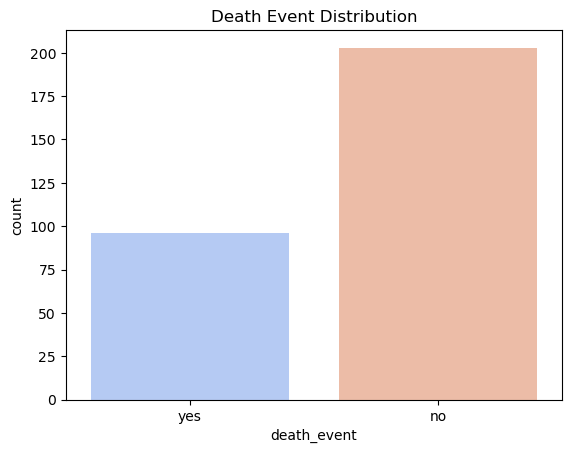

In [9]:
def plot_target_distribution():
    sns.countplot(x='death_event', data=data, palette='coolwarm', hue='death_event')
    plt.title('Death Event Distribution')
    plt.show()

plot_target_distribution()

- Matrix Correlation

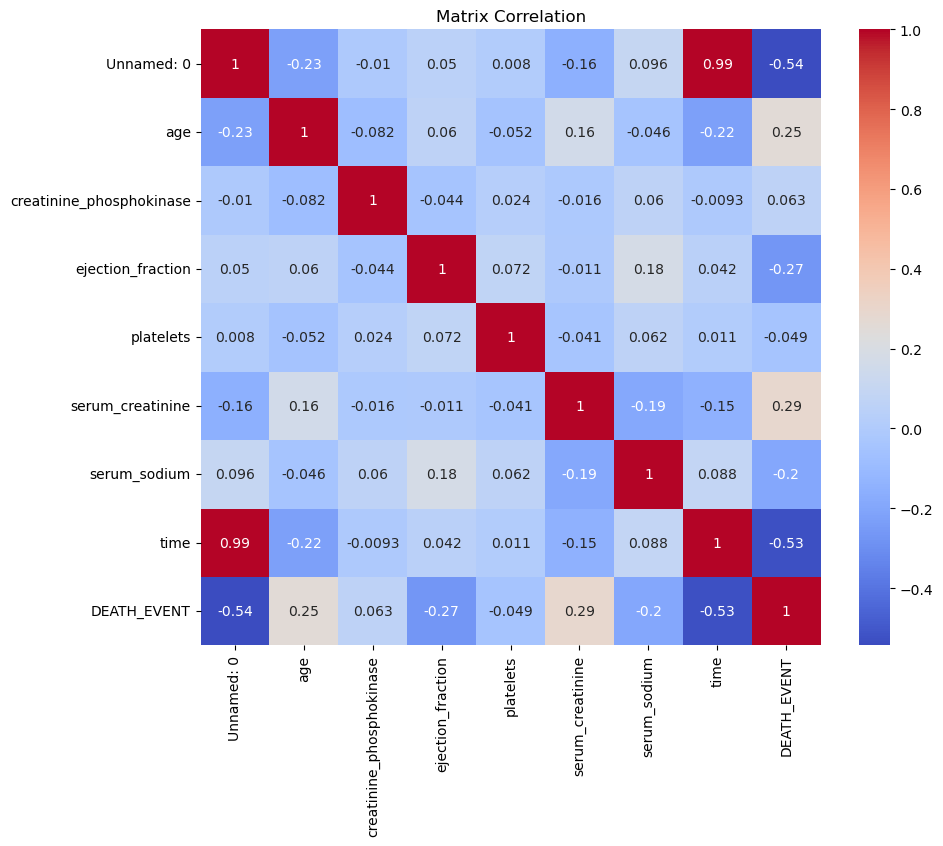

In [11]:
numerical_columns= data.select_dtypes(include=[np.number])
corr_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrix Correlation')
plt.show()

#### Data preprocessing and ETL

In [13]:
X = data.drop(columns=['death_event'])
y = data['death_event']

- Convert categorical variables to one-hot encoding
- Division into training and testing set

In [15]:
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=30, stratify=y)

- Numerical feature scaling

In [17]:
num_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

- Target variable encoding

In [19]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train.astype(str))
Y_test = le.transform(Y_test.astype(str))
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

#### Neural Model Building
- Model compilation
- Model training
- Model evaluation
- Predictions
- Classification report
- Confusion matrix

In [21]:
model = Sequential([
    InputLayer(shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(12, activation='relu'),
    Dense(2, activation='softmax')])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=100, batch_size=16, verbose=1, validation_split=0.2)

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print("\nLoss:", loss, "\nAccuracy:", acc)

y_estimate = model.predict(X_test, verbose=0)
y_estimate = np.argmax(y_estimate, axis=1)
y_true = np.argmax(Y_test, axis=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7172 - loss: 11.3179 - val_accuracy: 0.6905 - val_loss: 9.5843
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7286 - loss: 7.9289 - val_accuracy: 0.6905 - val_loss: 8.0866
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6702 - loss: 10.1641 - val_accuracy: 0.6905 - val_loss: 6.6058
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6221 - loss: 9.1998 - val_accuracy: 0.6905 - val_loss: 5.3160
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6779 - loss: 6.0292 - val_accuracy: 0.7143 - val_loss: 3.9041
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6818 - loss: 4.3954 - val_accuracy: 0.7143 - val_loss: 1.9805
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6622 - loss: 2.1054 - val_accuracy: 0.2381 - val_loss: 1.0360
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4344 - loss: 0.8571 - val_accuracy: 0.7381

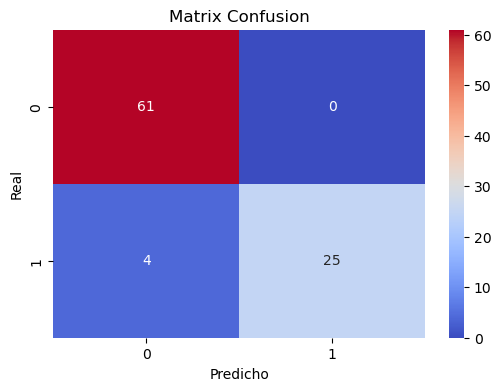

In [22]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_true, y_estimate), annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matrix Confusion')
plt.show()

In [23]:
print("\nReport:")
print(classification_report(y_true, y_estimate))


Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        61
           1       1.00      0.86      0.93        29

    accuracy                           0.96        90
   macro avg       0.97      0.93      0.95        90
weighted avg       0.96      0.96      0.95        90



## Conclusion

The results from the neural network model show promising performance in predicting death events related to heart failure. After thorough preprocessing, including encoding categorical variables, feature scaling, and splitting the data into training and testing sets, the model was trained and evaluated. The classification report and confusion matrix reveal the model's ability to distinguish between patients who survived and those who experienced heart failure-related death. This project not only demonstrates the potential of machine learning in healthcare but also highlights the importance of data preparation, model evaluation, and understanding the underlying patterns in medical data. Future improvements can be made by fine-tuning the model, experimenting with more advanced algorithms, and incorporating additional features for better prediction accuracy.
